In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_excel('Data_Train.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Info of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Check for null value in data

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data[data.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data[data.Total_Stops.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
data[data.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
a=pd.to_datetime(data.Date_of_Journey)

In [15]:
type(a[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey).dt.day

In [17]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey).dt.month

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [19]:
data.drop(columns='Date_of_Journey',inplace=True)

In [20]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [21]:
data.Dep_Time.apply(lambda X: int(X.split(':')[0]))

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10682, dtype: int64

In [22]:
pd.to_datetime(data.Dep_Time).dt.minute

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_Time, Length: 10682, dtype: int64

In [23]:
data['Dep_hour']=data.Dep_Time.apply(lambda X: int(X.split(':')[0]))
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [25]:
pd.to_datetime(data.Arrival_Time)

0       2022-03-22 01:10:00
1       2022-08-31 13:15:00
2       2022-06-10 04:25:00
3       2022-08-31 23:30:00
4       2022-08-31 21:35:00
                ...        
10678   2022-08-31 22:25:00
10679   2022-08-31 23:20:00
10680   2022-08-31 11:20:00
10681   2022-08-31 14:10:00
10682   2022-08-31 19:15:00
Name: Arrival_Time, Length: 10682, dtype: datetime64[ns]

In [26]:
    data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
    data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

In [27]:
data.drop('Dep_Time',axis=1,inplace=True)

In [28]:
data.drop(columns='Arrival_Time',inplace=True)

In [29]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [30]:
data.Duration.apply(lambda X:int(X.split()[0][0:-1]) if('h' in X.split()[0]) else 0).head()

0     2
1     7
2    19
3     5
4     4
Name: Duration, dtype: int64

In [31]:
data.Duration.apply(lambda X:int(X.split()[-1][0:-1]) if('m' in X.split()[-1]) else 0).head()

0    50
1    25
2     0
3    25
4    45
Name: Duration, dtype: int64

In [32]:
data.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [33]:
data['Duration_hour']=data.Duration.apply(lambda X:int(X.split()[0][0:-1]) if('h' in X.split()[0]) else 0)
data['Duration_min']=data.Duration.apply(lambda X:int(X.split()[-1][0:-1]) if('m' in X.split()[-1]) else 0)

In [34]:
data.drop(["Duration"], axis = 1, inplace = True)

In [35]:
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0


In [124]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

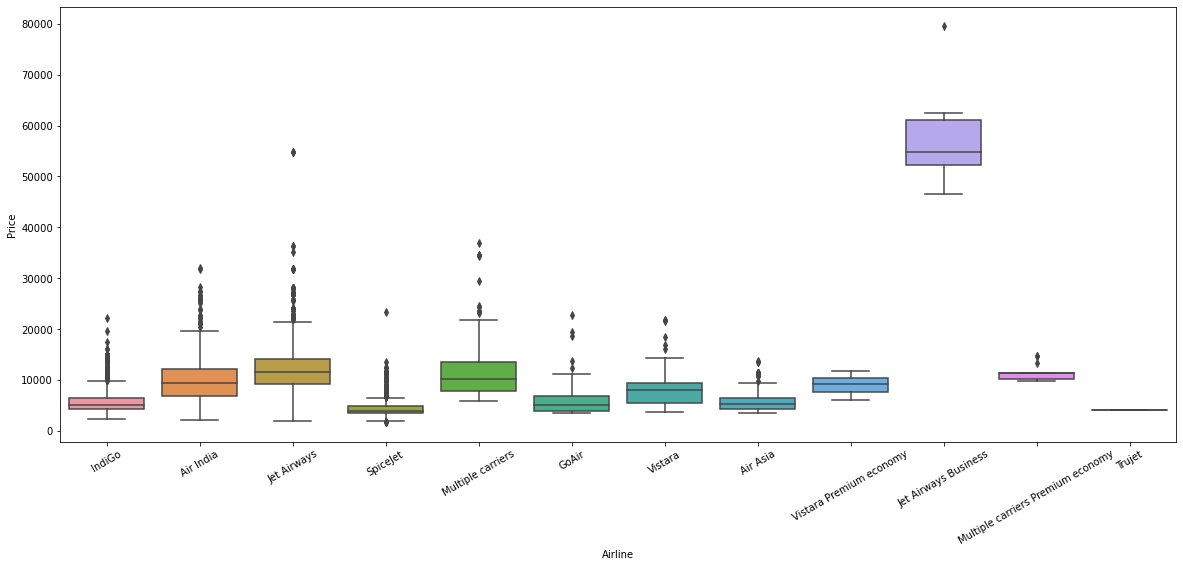

In [36]:
plt.figure(figsize=(20,8))
ax=sns.boxplot(x="Airline", y="Price", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


In [37]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

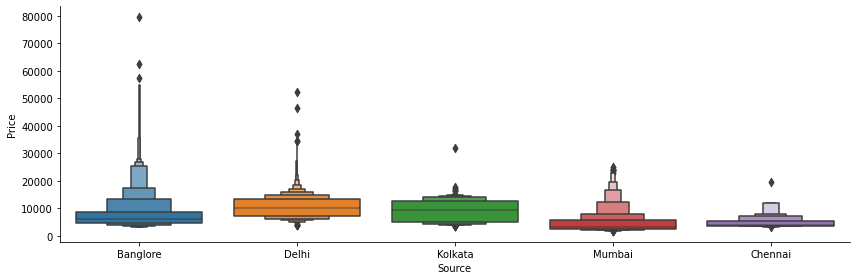

In [38]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)

In [39]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [105]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [106]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')

In [108]:
data.drop(columns=['Route','Additional_Info'],inplace=True)

In [109]:
data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50


In [110]:
databeforpipeline=data.copy()

In [111]:
temp=data.copy()

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
ctf_Airline=ColumnTransformer([('ohe_airline',OneHotEncoder(handle_unknown='ignore',sparse=False),['Airline'])],remainder='passthrough')

In [125]:
ctf_Source=ColumnTransformer([('ohe_source',OneHotEncoder(handle_unknown='ignore',sparse=False),['Source'])],remainder='passthrough')

In [126]:
ctf_Destination=ColumnTransformer([('ohe_destination',OneHotEncoder(handle_unknown='ignore',sparse=False),['Destination'])],remainder='passthrough')

In [117]:
ctf=ColumnTransformer(transformers=[('ohe_airline',OneHotEncoder(handle_unknown='ignore',sparse=False),['Airline']),
                                    ('ohe_source',OneHotEncoder(handle_unknown='ignore',sparse=False),['Source']),
                                    ('ohe_destination',OneHotEncoder(handle_unknown='ignore',sparse=False),['Destination'])
                                   ],remainder='passthrough')

In [129]:
a=ctf_Airline.fit_transform(temp)
a[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       'Banglore', 'New Delhi', 0, 3897, 24, 3, 22, 20, 1, 10, 2, 50],
      dtype=object)

In [118]:
ctf

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_airline',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Airline']),
                                ('ohe_source',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Source']),
                                ('ohe_destination',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Destination'])])

In [131]:
a=ctf.fit_transform(temp)

In [132]:
a.shape

(10682, 33)

In [137]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [138]:
pipe=Pipeline([('ohe_transform',ctf),('model',rfr)])

In [140]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0


In [142]:
X=data.drop(columns='Price')

In [143]:
y=data['Price']

In [144]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [148]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ohe_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_airline',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Airline']),
                                                 ('ohe_source',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Source']),
                                                 ('ohe_destination',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Destination'])])),
      

In [150]:
y_pred=pipe.predict(X_test)

In [151]:
from sklearn import metrics

In [164]:
metrics.r2_score(y_pred,y_test)

0.758781366309506

In [161]:
pipe.named_steps['ohe_transform']

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_airline',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Airline']),
                                ('ohe_source',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Source']),
                                ('ohe_destination',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Destination'])])

In [156]:
pipe.get_params()

{'memory': None,
 'steps': [('ohe_transform',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ohe_airline',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Airline']),
                                   ('ohe_source',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Source']),
                                   ('ohe_destination',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Destination'])])),
  ('model', RandomForestRegressor())],
 'verbose': False,
 'ohe_transform': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_airline',
        

In [162]:
pipe.score(X_train,y_train)

0.9518040259368252

In [163]:
pipe.score(X_test,y_test)

0.792280152980754

In [176]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ohe_transform', 'model', 'ohe_transform__n_jobs', 'ohe_transform__remainder', 'ohe_transform__sparse_threshold', 'ohe_transform__transformer_weights', 'ohe_transform__transformers', 'ohe_transform__verbose', 'ohe_transform__ohe_airline', 'ohe_transform__ohe_source', 'ohe_transform__ohe_destination', 'ohe_transform__ohe_airline__categories', 'ohe_transform__ohe_airline__drop', 'ohe_transform__ohe_airline__dtype', 'ohe_transform__ohe_airline__handle_unknown', 'ohe_transform__ohe_airline__sparse', 'ohe_transform__ohe_source__categories', 'ohe_transform__ohe_source__drop', 'ohe_transform__ohe_source__dtype', 'ohe_transform__ohe_source__handle_unknown', 'ohe_transform__ohe_source__sparse', 'ohe_transform__ohe_destination__categories', 'ohe_transform__ohe_destination__drop', 'ohe_transform__ohe_destination__dtype', 'ohe_transform__ohe_destination__handle_unknown', 'ohe_transform__ohe_destination__sparse', 'model__bootstrap', 'model__ccp_alpha', 'mode

In [187]:
pipe.get_params()['model__max_depth']

None


In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random=RandomizedSearchCV()

In [ ]:
RandomForestRegressor()

In [198]:
n_estimators=[x for x in range(100,1200,100)]
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = ['auto', 'sqrt']

In [199]:
params={'model__n_estimators':n_estimators,'model__max_depth':max_depth,
        'model__min_samples_split':min_samples_split,'model__min_samples_leaf':min_samples_leaf,
        'model__max_features':max_features}

In [200]:
random=RandomizedSearchCV(estimator=pipe,param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=5,n_jobs=1,verbose=2,random_state=42)

In [201]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=15, model__n_estimators=300; total time=   0.9s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=15, model__n_estimators=300; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=15, model__n_estimators=300; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=15, model__n_estimators=300; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=15, model__n_estimators=300; total time=   0.9s
[CV] END model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=10, model__min_samples_split=10, model__n_estimators=800; total time=   2.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ohe_transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe_airline',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['Airline']),
                                                                              ('ohe_source',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['Source']),

In [203]:
random.best_params_

{'model__n_estimators': 500,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_features': 'auto',
 'model__max_depth': 10}

In [204]:
prediction = random.predict(X_test)

In [205]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 1287.2258568454902
MSE: 4419949.338549578
RMSE: 2102.367555531044
R2: 0.7950126243944221


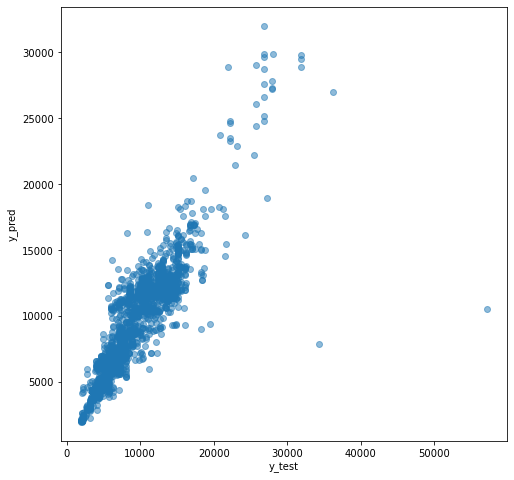

In [206]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [215]:
testingdata=pd.read_excel('Test_set.xlsx')

In [216]:
testingdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [217]:
testingdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [218]:
testingdata['Journey_day']=pd.to_datetime(testingdata.Date_of_Journey).dt.day
testingdata['Journey_month']=pd.to_datetime(testingdata.Date_of_Journey).dt.month

testingdata['Dep_hour']=testingdata.Dep_Time.apply(lambda X: int(X.split(':')[0]))
testingdata['Dep_min']=pd.to_datetime(testingdata.Dep_Time).dt.minute

testingdata['Arrival_hour']=pd.to_datetime(testingdata.Arrival_Time).dt.hour
testingdata['Arrival_min']=pd.to_datetime(testingdata.Arrival_Time).dt.minute

testingdata['Duration_hour']=testingdata.Duration.apply(lambda X:int(X.split()[0][0:-1]) if('h' in X.split()[0]) else 0)
testingdata['Duration_min']=testingdata.Duration.apply(lambda X:int(X.split()[-1][0:-1]) if('m' in X.split()[-1]) else 0)

testingdata.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

testingdata.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route','Additional_Info'],inplace=True)


In [219]:
testingdata

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,3,6,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,3,6,4,0,19,15,15,15


In [220]:
random.predict(testingdata)

array([12049.73848104,  4624.61673605, 13710.68966418, ...,
       16656.52582733, 13233.43240096,  8691.52337897])